## Import Dependencies and Load data


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

## Semi-Supervised Learning

In [204]:
df = pd.read_csv('wine-missing.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [205]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


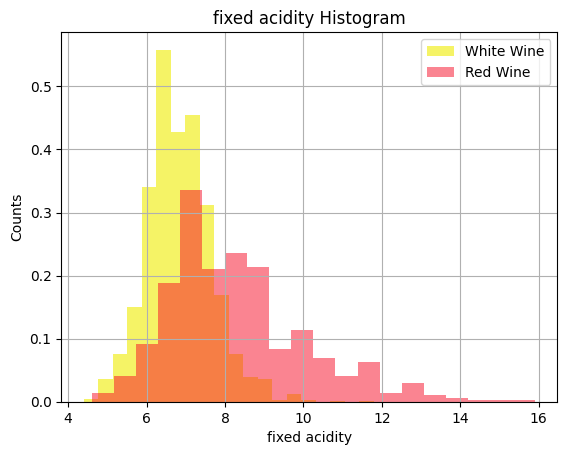

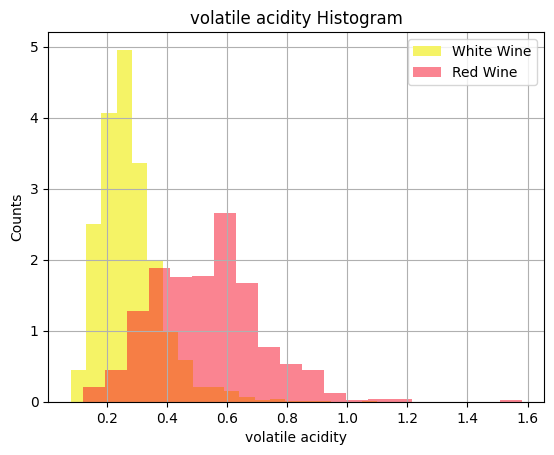

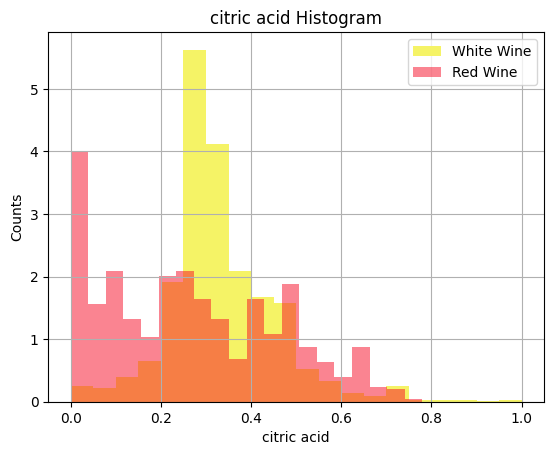

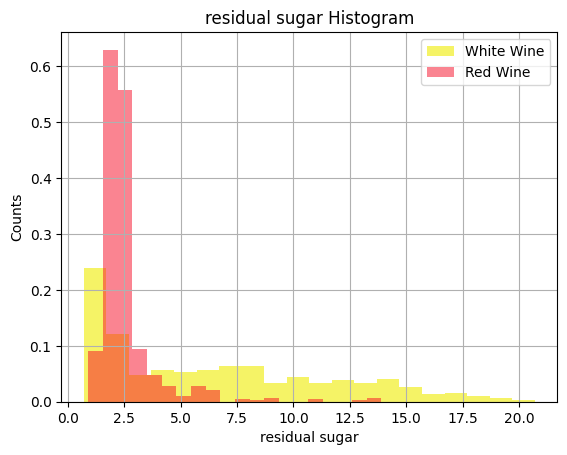

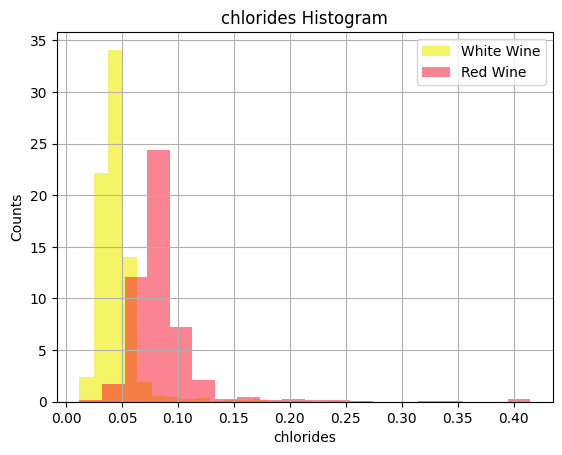

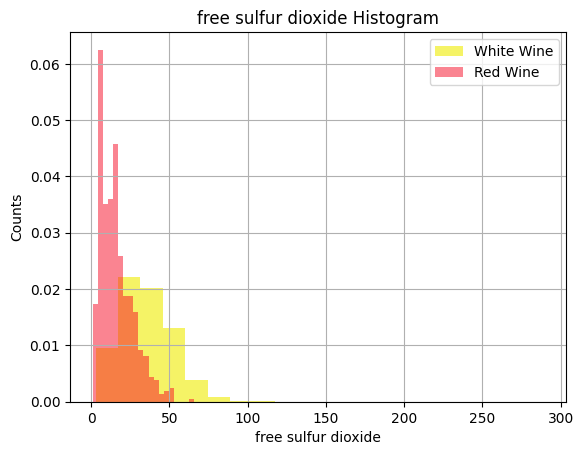

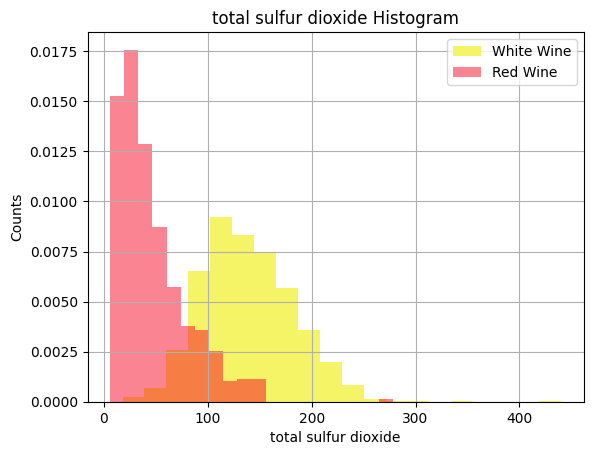

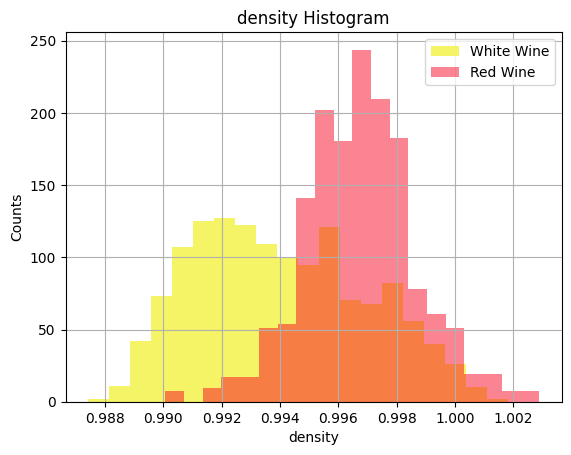

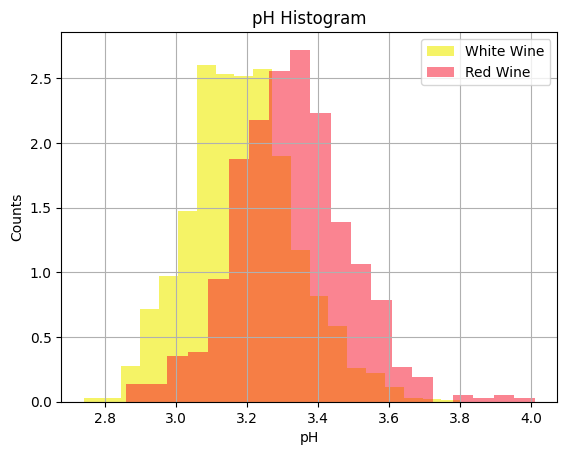

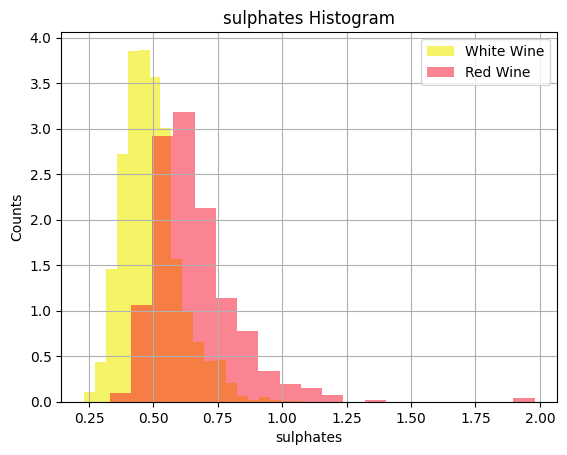

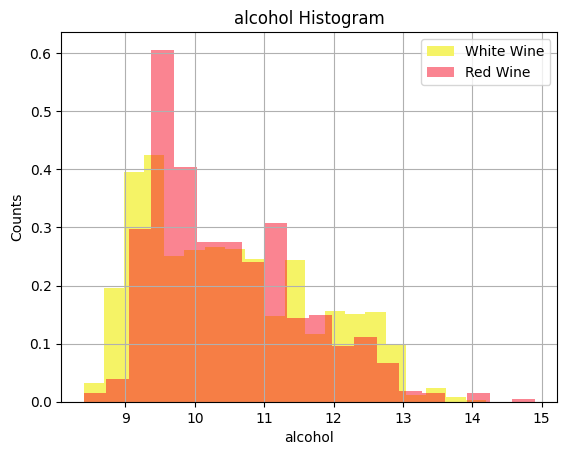

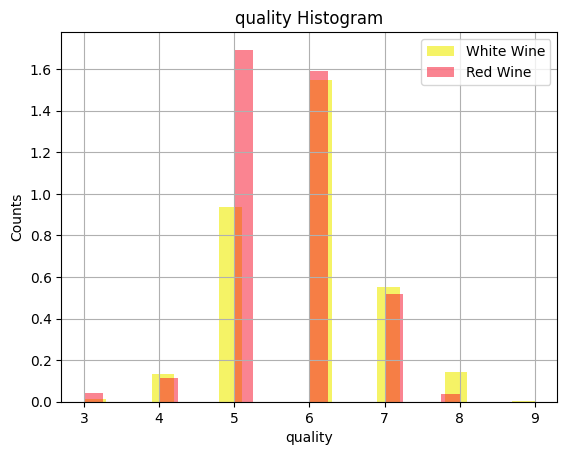

In [206]:
for feature in df.columns[1:]:
  df[df['type'] == 'white'][feature].hist(bins=20, color='#f5f366', label='White Wine', density=True)
  df[df['type'] == 'red'][feature].hist(bins=20, color='#f70b25', alpha=0.5, label = 'Red Wine', density=True) # We use density = True because we have 2 different sample sizes.
  plt.title(f'{feature} Histogram')
  plt.xlabel(feature)
  plt.ylabel('Counts')
  plt.legend()
  plt.show()
  print('\n')

---

We create histograms for the characteristics of the two different types of wine. It is clear that the characteristics vary depending on the type of wine.

- **Fixed and Volatile Acidity**: The distribution of fixed and volatile acidity for white wine has a lower mean value and is more constrained compared to red wine. Essentially, white wine is more acidic than red wine, while red wine covers a wider range of acidity.

- **Citric Acid**: Red wine has a somewhat uniform distribution, meaning it exhibits a wide variety in citric acid content, with most values tending toward the lower end. In contrast, white wine shows a much higher citric acid content and, again, does not have as wide a range as red wine.

- **Residual Sugar**: Red wine contains significantly lower amounts of residual sugar compared to white wine.

- **Chlorides**: White wine generally contains fewer chlorides than red wine.

- **Free and Total Sulfur Dioxide**: White wine exhibits a higher content of sulfur dioxide and has a broad distribution around the mean. In contrast, red wine's distribution is closer to zero.

- **Density**: Red wine appears to have a higher density than white wine.

- **pH**: Both types of wine fall within the acidic range of pH and are close to each other, with white wine being the more acidic of the two.

- **Sulphates**: Red wine contains more sulphates than white wine.

- **Alcohol**: The two types of wine are similar in alcohol content. Both cover a wide range, which depends exclusively on the preparation of each wine during distillation.

- **Quality**: Most red wines are categorized as 5-6, while white wines are more scattered across the scale, with more samples of higher quality than red wines.



---

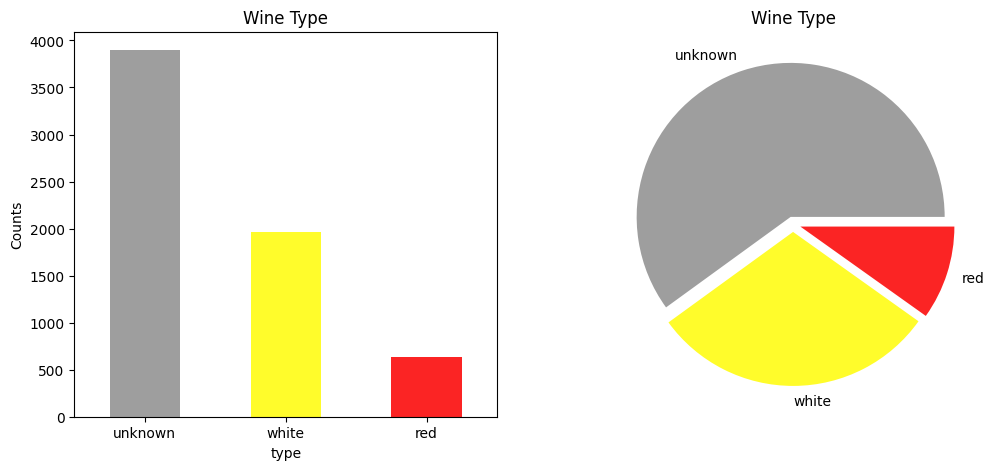

In [207]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df['type'].value_counts().plot.bar(rot=0, color=['#9e9e9e', '#fffc2b', '#fb2424'])
plt.ylabel('Counts')
plt.title('Wine Type')

plt.subplot(122)
df['type'].value_counts().plot.pie(rot=0, colors=['#9e9e9e', '#fffc2b', '#fb2424'], explode=[0.05, 0.05, 0.05])
plt.ylabel('')
plt.title('Wine Type')
plt.show()

In [208]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,unknown,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,unknown,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,unknown,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [209]:
df = df.replace(['white', 'red', 'unknown'], [0, 1, 2])

inputs = np.array(df.drop(columns='type'))
targets = np.array(df.replace(['white', 'red', 'unknown'], [0, 1, 2])['type'])

<ipython-input-209-f8725fb78eba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['white', 'red', 'unknown'], [0, 1, 2])


In [210]:
x_known = np.array(df[(df['type'] == 0) | (df['type'] == 1)].drop(columns='type'))
y_known = np.array(df[(df['type'] == 0) | (df['type'] == 1)]['type'])
x_unknown = np.array(df[df['type'] == 2].drop(columns='type'))

print(x_known.shape, y_known.shape, x_unknown.shape)

(2599, 12) (2599,) (3898, 12)


In [211]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, train_size=0.7, random_state=0)

print('X shape:', x_known.shape, x_train.shape, x_test.shape)
print('Y shape:', y_known.shape, y_train.shape, y_test.shape)

X shape: (2599, 12) (1819, 12) (780, 12)
Y shape: (2599,) (1819,) (780,)


In [212]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [213]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

train_pred = forest.predict(x_train)
test_pred = forest.predict(x_test)
print('Accuracy on train:', accuracy_score(train_pred, y_train))
print('Accuracy on test:', accuracy_score(test_pred, y_test), '\n')

print('Recall on train:', recall_score(train_pred, y_train))
print('Recall on test:', recall_score(test_pred, y_test), '\n')

print('Precision on train:', precision_score(train_pred, y_train))
print('Precision on test:', precision_score(test_pred, y_test), '\n')

print('F1 on train:', f1_score(train_pred, y_train))
print('F1 on test:', f1_score(test_pred, y_test))

Accuracy on train: 0.999450247388675
Accuracy on test: 0.9948717948717949 

Recall on train: 1.0
Recall on test: 0.989247311827957 

Precision on train: 0.9977973568281938
Precision on test: 0.989247311827957 

F1 on train: 0.9988974641675854
F1 on test: 0.989247311827957


---
The most representative metric for this specific problem is the F1 score, as one class has more data than the other. (With accuracy, if the model predicts the majority class correctly, it achieves higher accuracy, even if it performs poorly on the minority class.)

The F1 score, being the harmonic mean of precision and recall, provides a more balanced evaluation by considering both false positives and false negatives. This makes it particularly useful in imbalanced datasets, where one class significantly outweighs the other. In contrast, accuracy can be misleading in such cases, as it may appear high simply because the model is biased toward the majority class. Therefore, the F1 score is a more reliable metric for assessing the model's performance in this scenario.

---

In [214]:
forest = RandomForestClassifier(class_weight='balanced', random_state=0)
forest.fit(x_train, y_train)

train_pred = forest.predict(x_train)
test_pred = forest.predict(x_test)
print('Accuracy on train:', accuracy_score(train_pred, y_train))
print('Accuracy on test:', accuracy_score(test_pred, y_test), '\n')

print('Recall on train:', recall_score(train_pred, y_train))
print('Recall on test:', recall_score(test_pred, y_test), '\n')

print('Precision on train:', precision_score(train_pred, y_train))
print('Precision on test:', precision_score(test_pred, y_test), '\n')

print('F1 on train:', f1_score(train_pred, y_train))
print('F1 on test:', f1_score(test_pred, y_test))

Accuracy on train: 0.999450247388675
Accuracy on test: 0.9974358974358974 

Recall on train: 1.0
Recall on test: 1.0 

Precision on train: 0.9977973568281938
Precision on test: 0.989247311827957 

F1 on train: 0.9988974641675854
F1 on test: 0.9945945945945946


---
The model achieves higher accuracy with the parameter `class_weight = 'balanced'`. This parameter assigns weights to the classes, and with the balanced option, it uses the values of y to adjust the weights inversely proportional to their class frequencies. Essentially, it makes the model prioritize samples that appear less frequently over those that appear more often. As a result, the model will perform better on the minority class, leading to improved overall performance, especially in imbalanced datasets where one class significantly outnumbers the other.

---

In [215]:
y_unknown_prob = forest.predict_proba(x_unknown)
print(y_unknown_prob)

[[0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.02 0.98]
 [0.02 0.98]
 [0.02 0.98]]


In [216]:
y_unknown_prob = y_unknown_prob[:,0] # Probability of the sample belonging to class 0: 'white
new_labels = np.where(y_unknown_prob > 0.7, 0, np.where(y_unknown_prob < 0.3, 1, 2))
print(new_labels)

[0 0 0 ... 1 1 1]


In [217]:
# Clear data from 'unknown' samples
new_labels = new_labels.reshape(-1, 1)
labeled_data = np.hstack((x_unknown, new_labels))
print("Before dropping 'unknown' labels:", labeled_data.shape)

filter = (labeled_data[:, -1] == 1) | (labeled_data[:, -1] == 0)
labeled_data = labeled_data[filter]
print("After dropping 'unknown' labels:", labeled_data.shape)

Before dropping 'unknown' labels: (3898, 13)
After dropping 'unknown' labels: (3823, 13)


In [218]:
# Combining new and old data
new_inputs = labeled_data[:, :-1]
new_targets = labeled_data[:, -1]
y_train = y_train.reshape(-1, 1)
new_targets = new_targets.reshape(-1, 1)

x_train_new = np.vstack((x_train, new_inputs))
y_train_new = np.vstack((y_train, new_targets))
y_train_new = np.squeeze(y_train_new)
print(x_train_new.shape, y_train_new.shape)

(5642, 12) (5642,)


In [219]:
# Re-train the model
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train_new, y_train_new)

train_pred = forest.predict(x_train_new)
test_pred = forest.predict(x_test)
print('Accuracy on train:', accuracy_score(train_pred, y_train_new))
print('Accuracy on test:', accuracy_score(test_pred, y_test), '\n')

print('Recall on train:', recall_score(train_pred, y_train_new))
print('Recall on test:', recall_score(test_pred, y_test), '\n')

print('Precision on train:', precision_score(train_pred, y_train_new))
print('Precision on test:', precision_score(test_pred, y_test), '\n')

print('F1 on train:', f1_score(train_pred, y_train_new))
print('F1 on test:', f1_score(test_pred, y_test))

Accuracy on train: 0.999822757887274
Accuracy on test: 0.9974358974358974 

Recall on train: 1.0
Recall on test: 1.0 

Precision on train: 0.9992587101556709
Precision on test: 0.989247311827957 

F1 on train: 0.9996292176492398
F1 on test: 0.9945945945945946


---

The performance of the model has increased by adding the new samples.

---

## Model Evaluation


In [251]:
df = pd.read_csv('wine-full.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


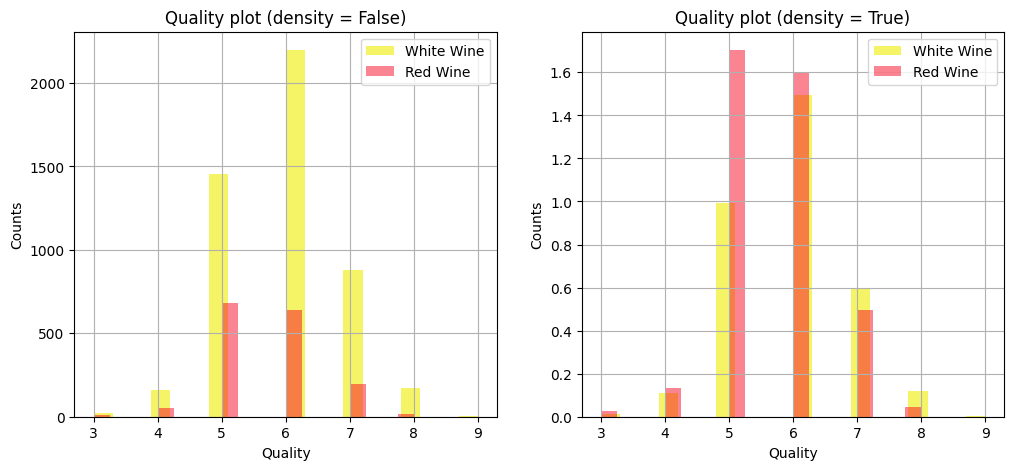

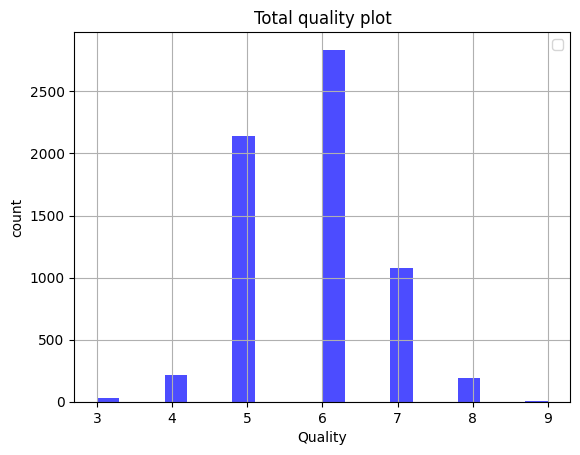

In [221]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df[df['type'] == 'white']['quality'].hist(bins=20, color='#f5f366', label='White Wine')
df[df['type'] == 'red']['quality'].hist(bins=20, color='#f70b25', alpha=0.5, label = 'Red Wine')
plt.title('Quality plot (density = False)')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.legend()

plt.subplot(122)
df[df['type'] == 'white']['quality'].hist(bins=20, color='#f5f366', label='White Wine', density=True)
df[df['type'] == 'red']['quality'].hist(bins=20, color='#f70b25', alpha=0.5, label = 'Red Wine', density=True)
plt.title('Quality plot (density = True)')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.legend()
plt.show()

df['quality'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Total quality plot')
plt.xlabel('Quality')
plt.ylabel('count')
plt.legend()
plt.show()

We observe that the quality variable is not balanced, as its values are not uniformly distributed. This imbalance means that certain quality ratings occur more frequently than others, which can lead to biased model performance.

From the histograms above, it appears that white wine is generally of higher quality, as its distribution has a higher mean value. 

In [222]:
df['residual sugar'].median()

3.0

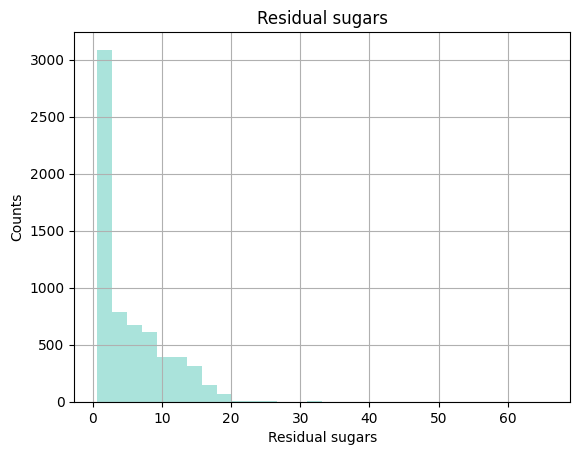

In [223]:
df['residual sugar'].hist(bins=30, color = '#aae3db')
plt.title('Residual sugars')
plt.ylabel('Counts')
plt.xlabel('Residual sugars')
plt.show()

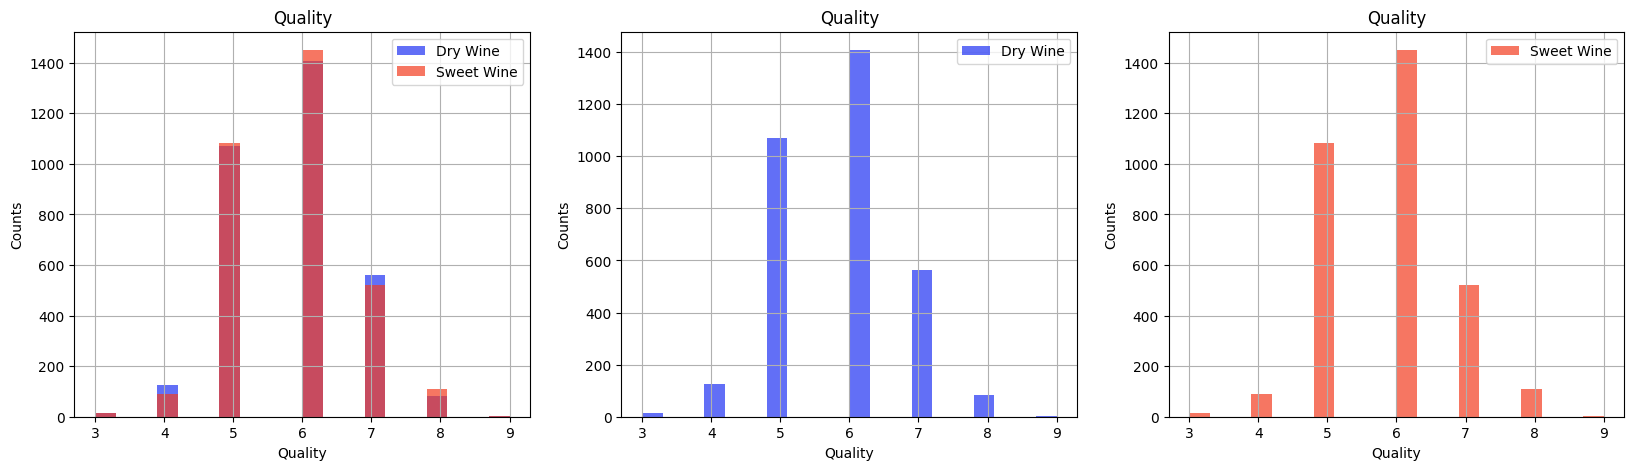

In [224]:
plt.figure(figsize=(20,5))
plt.subplot(131)
df[df['residual sugar'] <= 3]['quality'].hist(bins=20, color='#1f32f3', alpha=0.7, label = 'Dry Wine')
df[df['residual sugar'] >= 3]['quality'].hist(bins=20, color='#f33c1f',alpha=0.7, label='Sweet Wine')
plt.title('Quality')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.legend()


plt.subplot(132)
df[df['residual sugar'] <= 3]['quality'].hist(bins=20, color='#1f32f3', alpha=0.7, label = 'Dry Wine')
plt.title('Quality')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.legend()


plt.subplot(133)
df[df['residual sugar'] >= 3]['quality'].hist(bins=20, color='#f33c1f',alpha=0.7, label='Sweet Wine')
plt.title('Quality')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.legend()
plt.show()

The sweetness level (residual sugar content) does not appear to have a significant impact on the perceived quality of the wine. This suggests that other factors, such as acidity, alcohol content, balance of flavors, or aromatic complexity, play a more critical role in determining wine quality.

In [252]:
df = pd.get_dummies(df, columns=['type'], drop_first=True, dtype=int)

In [253]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [254]:
inputs = np.array(df.drop(columns='quality'))
targets = np.array(df['quality'])
print(inputs.shape, targets.shape)

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.9, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6497, 12) (6497,)
(5847, 12) (650, 12) (5847,) (650,)


In [255]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
mae = mean_absolute_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_pred, y_test)
print('MAE:', mae, 'MAPE:', mape)

MAE: 0.4584615384615385 MAPE: 0.07771245421245421


In [256]:
mae_lst = []
mape_lst = []
seeds = np.arange(10)

for seed in seeds:
  x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.9, random_state=seed)

  tree = DecisionTreeRegressor(random_state=0)
  tree.fit(x_train, y_train)

  y_pred = tree.predict(x_test)
  mae = mean_absolute_error(y_pred, y_test)
  mape = mean_absolute_percentage_error(y_pred, y_test)
  mae_lst.append(mae)
  mape_lst.append(mape)

mae_lst = np.array(mae_lst)
mape_lst = np.array(mape_lst)
print(f'MAE mean: {mae_lst.mean()} MAE std: {mae_lst.std()}')
print(f'MAPE mean: {mape_lst.mean()} MAPE std: {mape_lst.std()}')

MAE mean: 0.46369230769230774 MAE std: 0.02866827205265792
MAPE mean: 0.08220140415140414 MAPE std: 0.0057901795013216


The mean value indicates the model's performance, specifically how well it performs in making predictions, while the standard deviation shows how consistent the model is across different samples. In this case, both the mean value and the standard deviation are highly satisfactory.

In [257]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.9, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, random_state=0)
print(inputs.shape, targets.shape)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(6497, 12) (6497,)
(4677, 12) (1170, 12) (650, 12) (4677,) (1170,) (650,)


In [258]:
max_depth = [3, 5, 10, 20, 30, 40]
min_samples_split = [2, 3, 4]
max_features = ['sqrt', 'log2']

mape_df = []

for depth in max_depth:
  for min in min_samples_split:
    for feat in max_features:
      tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=min, max_features=feat, random_state=0)
      tree.fit(x_train, y_train)
      y_train_pred = tree.predict(x_train)
      y_val_pred = tree.predict(x_val)
      train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
      val_mape = mean_absolute_percentage_error(y_val_pred, y_val)
      new_row = [depth, min, feat, train_mape, val_mape]
      mape_df.append(new_row)

mape_df = pd.DataFrame(mape_df, columns=['max_depth', 'min_samples_split', 'max_features', 'Train MAPE', 'Val MAPE'])

In [259]:
mape_df.sort_values('Val MAPE').head()

,max_depth,min_samples_split,max_features,Train MAPE,Val MAPE
19,20,2,log2,0.003902,0.086698
18,20,2,sqrt,0.003902,0.086698
31,40,2,log2,0.000000,0.087375
30,40,2,sqrt,0.000000,0.087375
25,30,2,log2,0.000000,0.087375


The best hyperparameters for the validation train set are `max_depth=20, min_samples_split=2, max_features='log2'`.

In [260]:
mape_df.sort_values('Train MAPE').head()

,max_depth,min_samples_split,max_features,Train MAPE,Val MAPE
24,30,2,sqrt,0.000000,0.087375
31,40,2,log2,0.000000,0.087375
30,40,2,sqrt,0.000000,0.087375
25,30,2,log2,0.000000,0.087375
19,20,2,log2,0.003902,0.086698


The best hyperparameters for the training set are `max_depth=30, min_samples_split=2, max_features='sqrt'`.

The validation set is more reliable for tuning hyperparameters because this set does not contribute to the training of the model. If we tuned the hyperparameters based on the training set, we would always end up with overfitting, as the model would essentially "memorize" the training data rather than generalize well to unseen data.

In [261]:
tree = DecisionTreeRegressor(max_depth=30, min_samples_split=2, max_features='sqrt', random_state=0)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print('(train) MAPE:', mean_absolute_percentage_error(y_pred, y_test))

tree = DecisionTreeRegressor(max_depth=20, min_samples_split=2, max_features='log2', random_state=0)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print('(val) MAPE:', mean_absolute_percentage_error(y_pred, y_test))

(train) MAPE: 0.09294322344322345
(val) MAPE: 0.09193347509668158


Improved performance by using validation parameters.

In [262]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.9, random_state=0)

In [263]:
param_grid ={
    'max_depth': [3, 5, 10, 20, 30, 40],
    'min_samples_split' :[2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

tree = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(tree, param_grid, scoring = mean_absolute_error, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best parameters found:', grid_search.best_params_)

Best parameters found: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [264]:
tree = DecisionTreeRegressor(max_depth=3, min_samples_split=2, max_features='sqrt', random_state=0)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MAPE:', mean_absolute_percentage_error(y_pred, y_test))

MAE: 0.6700634842563928
MAPE: 0.11568665399420555



Cross-validation is the most reliable method because it conducts multiple experiments to find the optimal parameters and inherently accounts for overfitting. If we were to perform this process manually using the first method (e.g., a single train-validation split), it could take significantly more time and effort.


In [265]:
param_grid ={
    'max_depth': [5],
    'min_samples_split' :[2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

tree = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(tree, param_grid, scoring = mean_absolute_error, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best parameters found:', grid_search.best_params_)

Best parameters found: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


In [266]:
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, max_features='sqrt', random_state=0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', random_state=0)

In [267]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_white'],
      dtype='object')

[Text(0.4774590163934426, 0.9166666666666666, 'x[4] <= 0.039\nsquared_error = 0.759\nsamples = 5847\nvalue = 5.821'),
 Text(0.21721311475409835, 0.75, 'x[3] <= 1.275\nsquared_error = 0.827\nsamples = 1701\nvalue = 6.182'),
 Text(0.3473360655737705, 0.8333333333333333, 'True  '),
 Text(0.09016393442622951, 0.5833333333333334, 'x[5] <= 13.5\nsquared_error = 0.889\nsamples = 233\nvalue = 5.828'),
 Text(0.03278688524590164, 0.4166666666666667, 'x[7] <= 0.989\nsquared_error = 0.583\nsamples = 41\nvalue = 4.951'),
 Text(0.01639344262295082, 0.25, 'squared_error = 0.0\nsamples = 4\nvalue = 6.0'),
 Text(0.04918032786885246, 0.25, 'x[9] <= 0.395\nsquared_error = 0.514\nsamples = 37\nvalue = 4.838'),
 Text(0.03278688524590164, 0.08333333333333333, 'squared_error = 0.227\nsamples = 23\nvalue = 4.652'),
 Text(0.06557377049180328, 0.08333333333333333, 'squared_error = 0.837\nsamples = 14\nvalue = 5.143'),
 Text(0.14754098360655737, 0.4166666666666667, 'x[5] <= 23.5\nsquared_error = 0.755\nsamples =

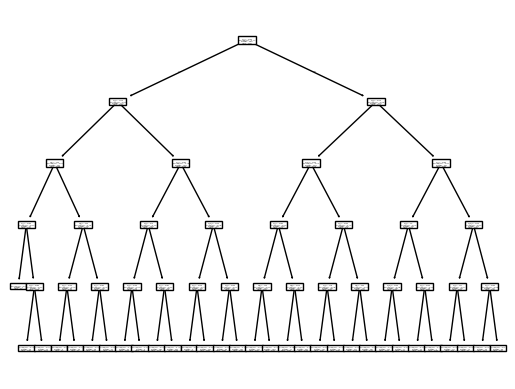

In [268]:
plot_tree(tree)

In [269]:
tree_rules = export_text(tree, feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_white'])
print(tree_rules)

|--- chlorides <= 0.04
|   |--- residual sugar <= 1.27
|   |   |--- free sulfur dioxide <= 13.50
|   |   |   |--- density <= 0.99
|   |   |   |   |--- value: [6.00]
|   |   |   |--- density >  0.99
|   |   |   |   |--- sulphates <= 0.39
|   |   |   |   |   |--- value: [4.65]
|   |   |   |   |--- sulphates >  0.39
|   |   |   |   |   |--- value: [5.14]
|   |   |--- free sulfur dioxide >  13.50
|   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |--- citric acid <= 0.24
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- citric acid >  0.24
|   |   |   |   |   |--- value: [5.80]
|   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- value: [6.33]
|   |   |   |   |--- density >  0.99
|   |   |   |   |   |--- value: [5.62]
|   |--- residual sugar >  1.27
|   |   |--- density <= 0.99
|   |   |   |--- total sulfur dioxide <= 67.50
|   |   |   |   |--- residual sugar <= 3.72
|   |   |   |   |   |--- value: [5.85]
|   |   |

Above we show the rules of the tree.


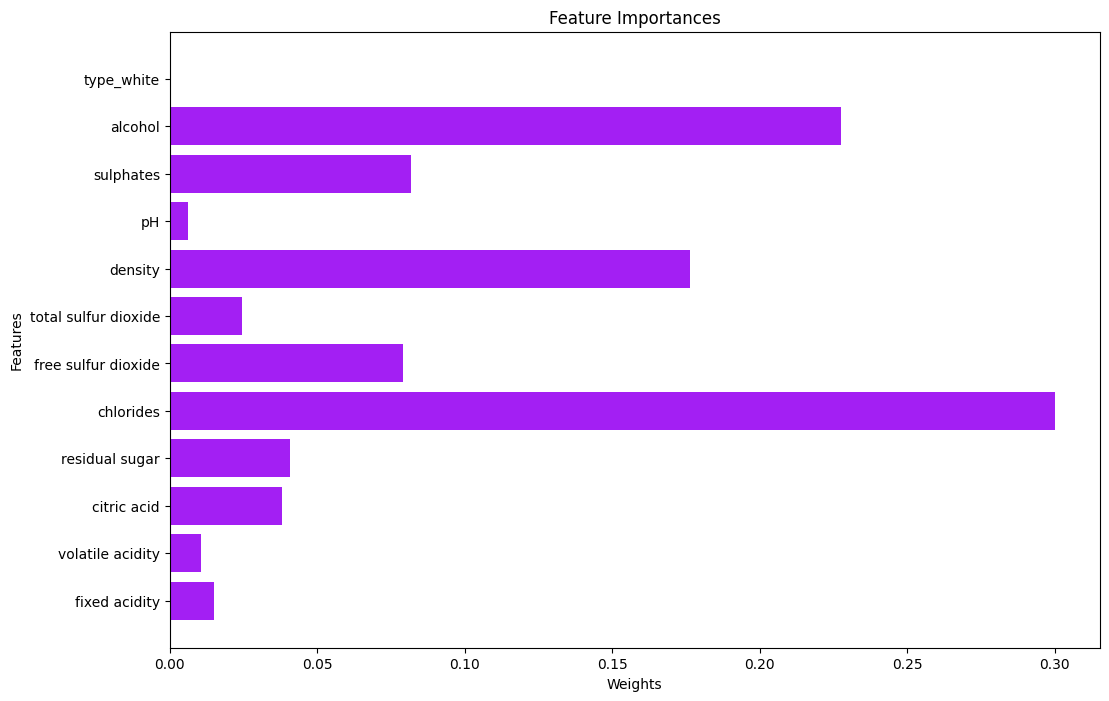

In [270]:
features = df.drop(columns='quality').columns

plt.figure(figsize=(12,8))
plt.barh(features, tree.feature_importances_, color='#a31ff3')
plt.title('Feature Importances')
plt.xlabel('Weights')
plt.ylabel('Features')
plt.show()

The most important features that determine the quality of the wine are: `chlorides, alcohol, density, sulphates, free sulfur dioxide`.